# Data Analysis Interview  Challenge  

# Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute  time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime


In [2]:
logins =  pd.read_json (r'C:\Users\phaneendra.veguru\Desktop\New folder\ultimate_challenge/logins.json')
df= pd.read_json (r'C:\Users\phaneendra.veguru\Desktop\New folder\ultimate_challenge/logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
 logins.tail(10)

,login_time
93132,1970-04-13 18:36:53
93133,1970-04-13 18:40:31
93134,1970-04-13 18:46:06
93135,1970-04-13 18:40:40
93136,1970-04-13 18:48:52
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [4]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
logins.isnull().sum()

login_time    0
dtype: int64

Data does not have any null values.We have 3.5 months of data,April is having only 2 weeks data.

In [6]:
import calendar 
import datetime
def findDay(date): 
    a=datetime.datetime.strftime(date,'%Y-%m-%d %H:%M:%S')  # convert timestamp to str
    D = datetime.datetime.strptime(a, '%Y-%m-%d %H:%M:%S').weekday()
    
    return (calendar.day_name[D]) 

In [7]:
logins['month'] = pd.DatetimeIndex(logins['login_time']).month
logins['day'] = pd.DatetimeIndex(logins['login_time']).day
logins['hour'] = pd.DatetimeIndex(logins['login_time']).hour
logins['weekday']= logins['login_time'].apply(findDay)
logins['count'] =1

In [8]:
logins.head()

,login_time,month,day,hour,weekday,count
0,1970-01-01 20:13:18,1,1,20,Thursday,1
1,1970-01-01 20:16:10,1,1,20,Thursday,1
2,1970-01-01 20:16:37,1,1,20,Thursday,1
3,1970-01-01 20:16:36,1,1,20,Thursday,1
4,1970-01-01 20:26:21,1,1,20,Thursday,1


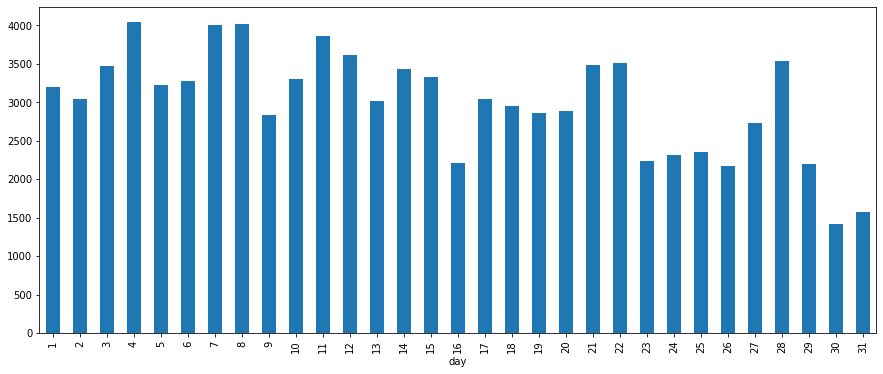

In [9]:
D = logins[['day','month']].groupby('day').count()
D.plot(kind ='bar',figsize=(15,6),legend=None)

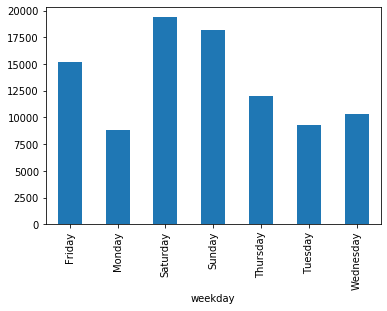

In [10]:
D = logins[['weekday','month']].groupby('weekday').count()
D.plot(kind ='bar',figsize=(6,4),legend=None)

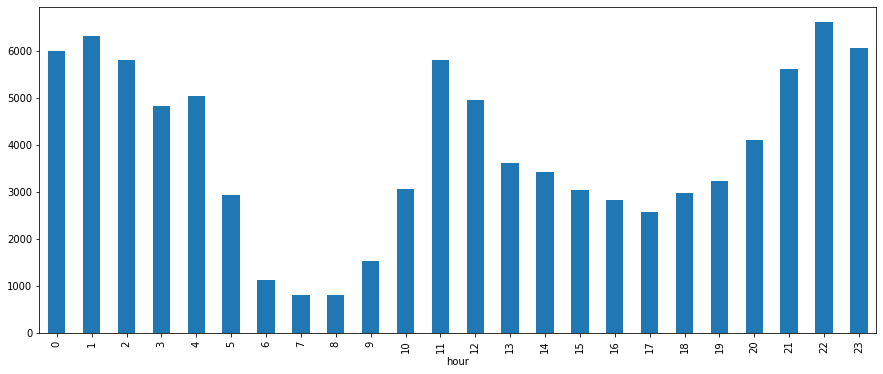

In [11]:
D = logins[['day','hour']].groupby('hour').count()
D.plot(kind ='bar',figsize=(15,6),legend=None)

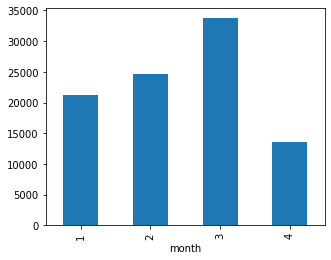

In [12]:
D = logins[['day','month']].groupby('month').count()
D.plot(kind ='bar',figsize=(5,4),legend=None)

In [13]:
logins= logins.set_index(['login_time'])
logins.head()

,month,day,hour,weekday,count
login_time,,,,,
1970-01-01 20:13:18,1,1,20,Thursday,1
1970-01-01 20:16:10,1,1,20,Thursday,1
1970-01-01 20:16:37,1,1,20,Thursday,1
1970-01-01 20:16:36,1,1,20,Thursday,1
1970-01-01 20:26:21,1,1,20,Thursday,1


#Visualazing every 15min time interval data.

In [14]:

logins_15 = logins[['count']].resample('15T').count()
logins_15 = logins_15.reset_index()
logins_15.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [15]:
logins_15.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


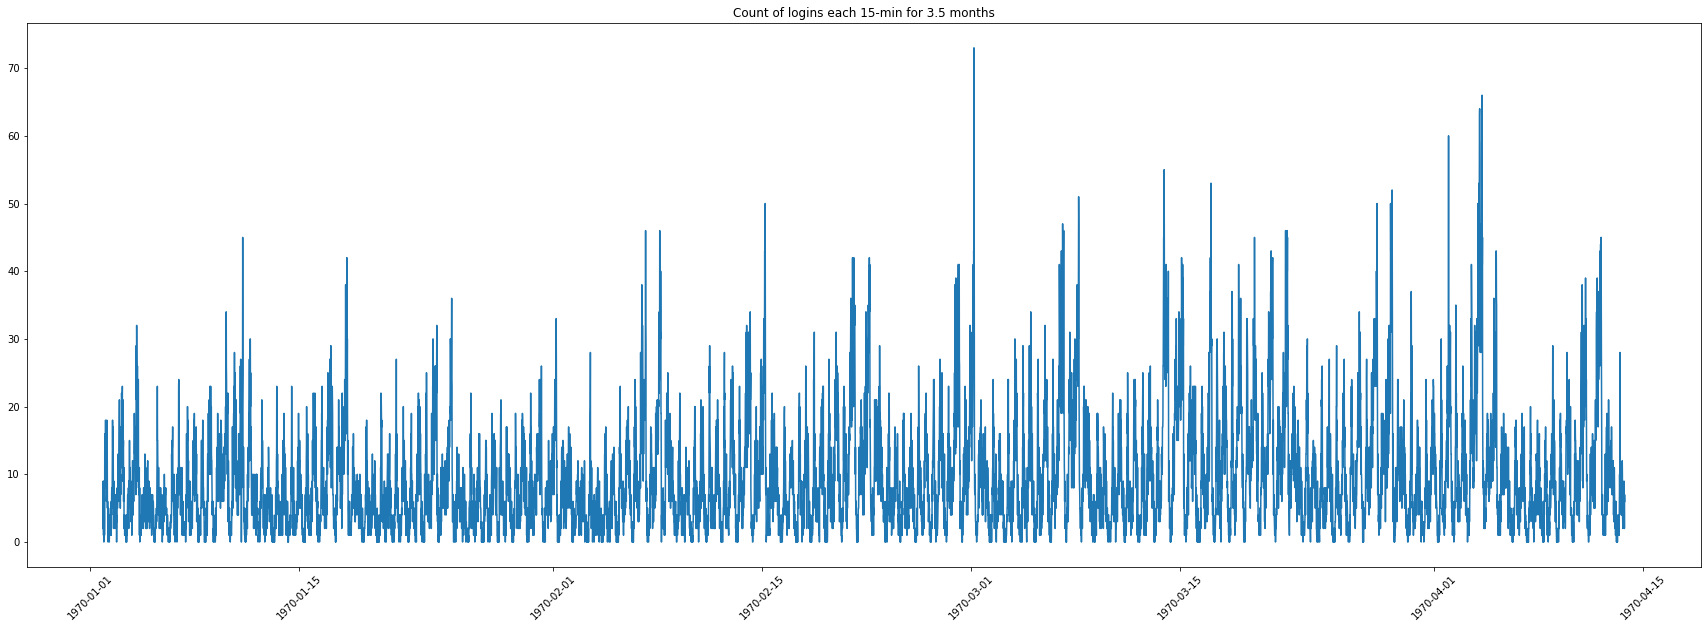

In [16]:
plt.figure(figsize=(30,10))
plt.plot(logins_15['login_time'],logins_15['count'])
plt.title('Count of logins each 15-min for 3.5 months')
plt.xticks(rotation=45);

Spikes looks regular, with a mean of 9.5 logins.

In [17]:
#logins_15 = logins_15.set_index(['login_time'])
#logins_15.head()

#Weekly Data

In [18]:
logins_W =  logins[['count']].resample('W').count()
logins_W = logins_W.reset_index()
logins_W.head()

,login_time,count
0,1970-01-04,2374
1,1970-01-11,5217
2,1970-01-18,5023
3,1970-01-25,4751
4,1970-02-01,4744


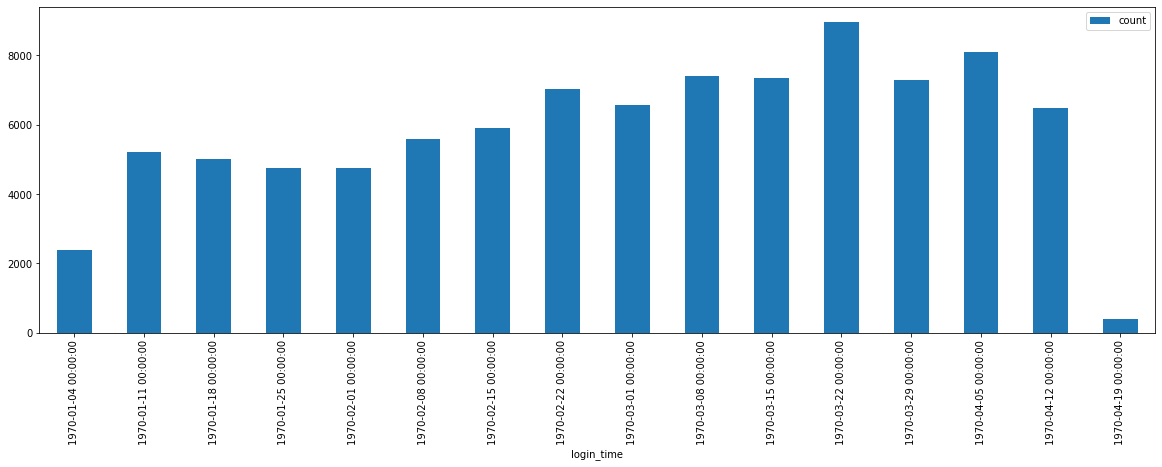

In [19]:
logins_W.plot(kind='bar',x='login_time', y='count',figsize=(20,6))

1. At the week level, one sees that counts are increasing overall suggesting that the business is acquiring getting customers.
2. At the hour level, one sees the times of the greatest and least activity: The least activity occurs in the period between 6AM and 10AM while the most activity occurs in the period between 11AM and 1PM .
3. At the day of the week level, one sees that the lowest activity occurs on Monday and rises through the week with the peak activity on Saturday followed by a slight dip on Sunday.


# Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:                                         
a. how you will implement the experiment                                    
b. what statistical test(s) you will conduct to verify the significance of the observation                        
c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.              

# Solution

The only measure of success in that could validate this experiment, implicitly is customer activity in both cities being increased due to the more drivers being available in both cities. If customer activity is significantly enhanced in both cities then that would show positive results. A simple quantitative metric that we could observe is the comparison of the number of times a driver crossed the bridge pre reimbursement and post reimbursement.
Since the standard deviation of our customer activity will be known prior to attempting this, I would use a 1-sample z statistic with the assumption that we have a sample size of at least 30.

H0 : there is no difference between drivers crossing the bridge for when the company is not reimbursing drivers for toll costs and when the company is reimbursing drivers for toll cost           

H1 : there is a difference between drivers crossing the bridge for when the company is not reimbursing drivers for toll costs and when the company is reimbursing drivers for toll cost        

I would then calculate the z-score for the customer activity after implementation of the reimbursement.              
Then using a 95% confidence interval I would determine whether or not the z-score falls in that range, and observe whether or not the null hypothesis can be rejected .                     
If it can be rejected then I would recommend that the company continue to reimburse toll costs and continue to observe the number of times drivers are crossing the bridge to make sure company money is well spent.

# Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

In [20]:
import json

with open(r'C:\Users\phaneendra.veguru\Desktop\New folder\ultimate_challenge/ultimate_data_challenge.json') as f:
    Data = json.load(f)

Data = pd.DataFrame(Data)
Data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


# Data description
city: city this user signed up in              
phone: primary device for this user                             
signup_date: date of account registration; in the form ‘YYYY MM DD’                     
last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’                
avg_dist: the average distance in miles per trip taken in the first 30 days after signup              
avg_rating_by_driver: the rider’s average rating over all of their trips                 
avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips                    
surge_pct: the percent of trips taken with surge multiplier > 1                           
avg_surge: The average surge multiplier over all of this user’s trips                   
trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up                     
ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise                 
weekday_pct: the percent of the user’s trips occurring during a weekday                        

In [21]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [22]:
# Convert objects to dates
Data['last_trip_date'] = pd.to_datetime(Data['last_trip_date'])
Data['signup_date'] = pd.to_datetime(Data['signup_date'])

In [23]:
Data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [24]:
Data.duplicated().sum()

8

In [25]:
Data.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [26]:
# Impute in missing values
Data['avg_rating_by_driver'].fillna(Data['avg_rating_by_driver'].mean(), inplace=True)
Data['avg_rating_of_driver'].fillna(Data['avg_rating_of_driver'].mean(), inplace=True)
Data['phone'].fillna('None', inplace=True)

In [27]:
Data['ultimate_black_user'] = Data['ultimate_black_user'].apply(lambda x: 1 if x else 0)
Data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4


# Data Visualization

In [28]:
names = Data.columns

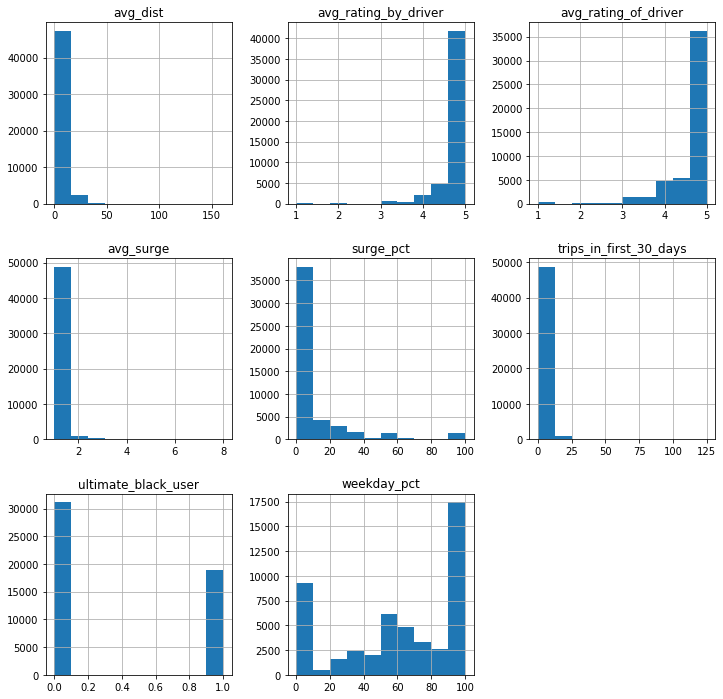

In [29]:
Data[names].hist(figsize=(12, 12));

C:\Users\phaneendra.veguru\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\phaneendra.veguru\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


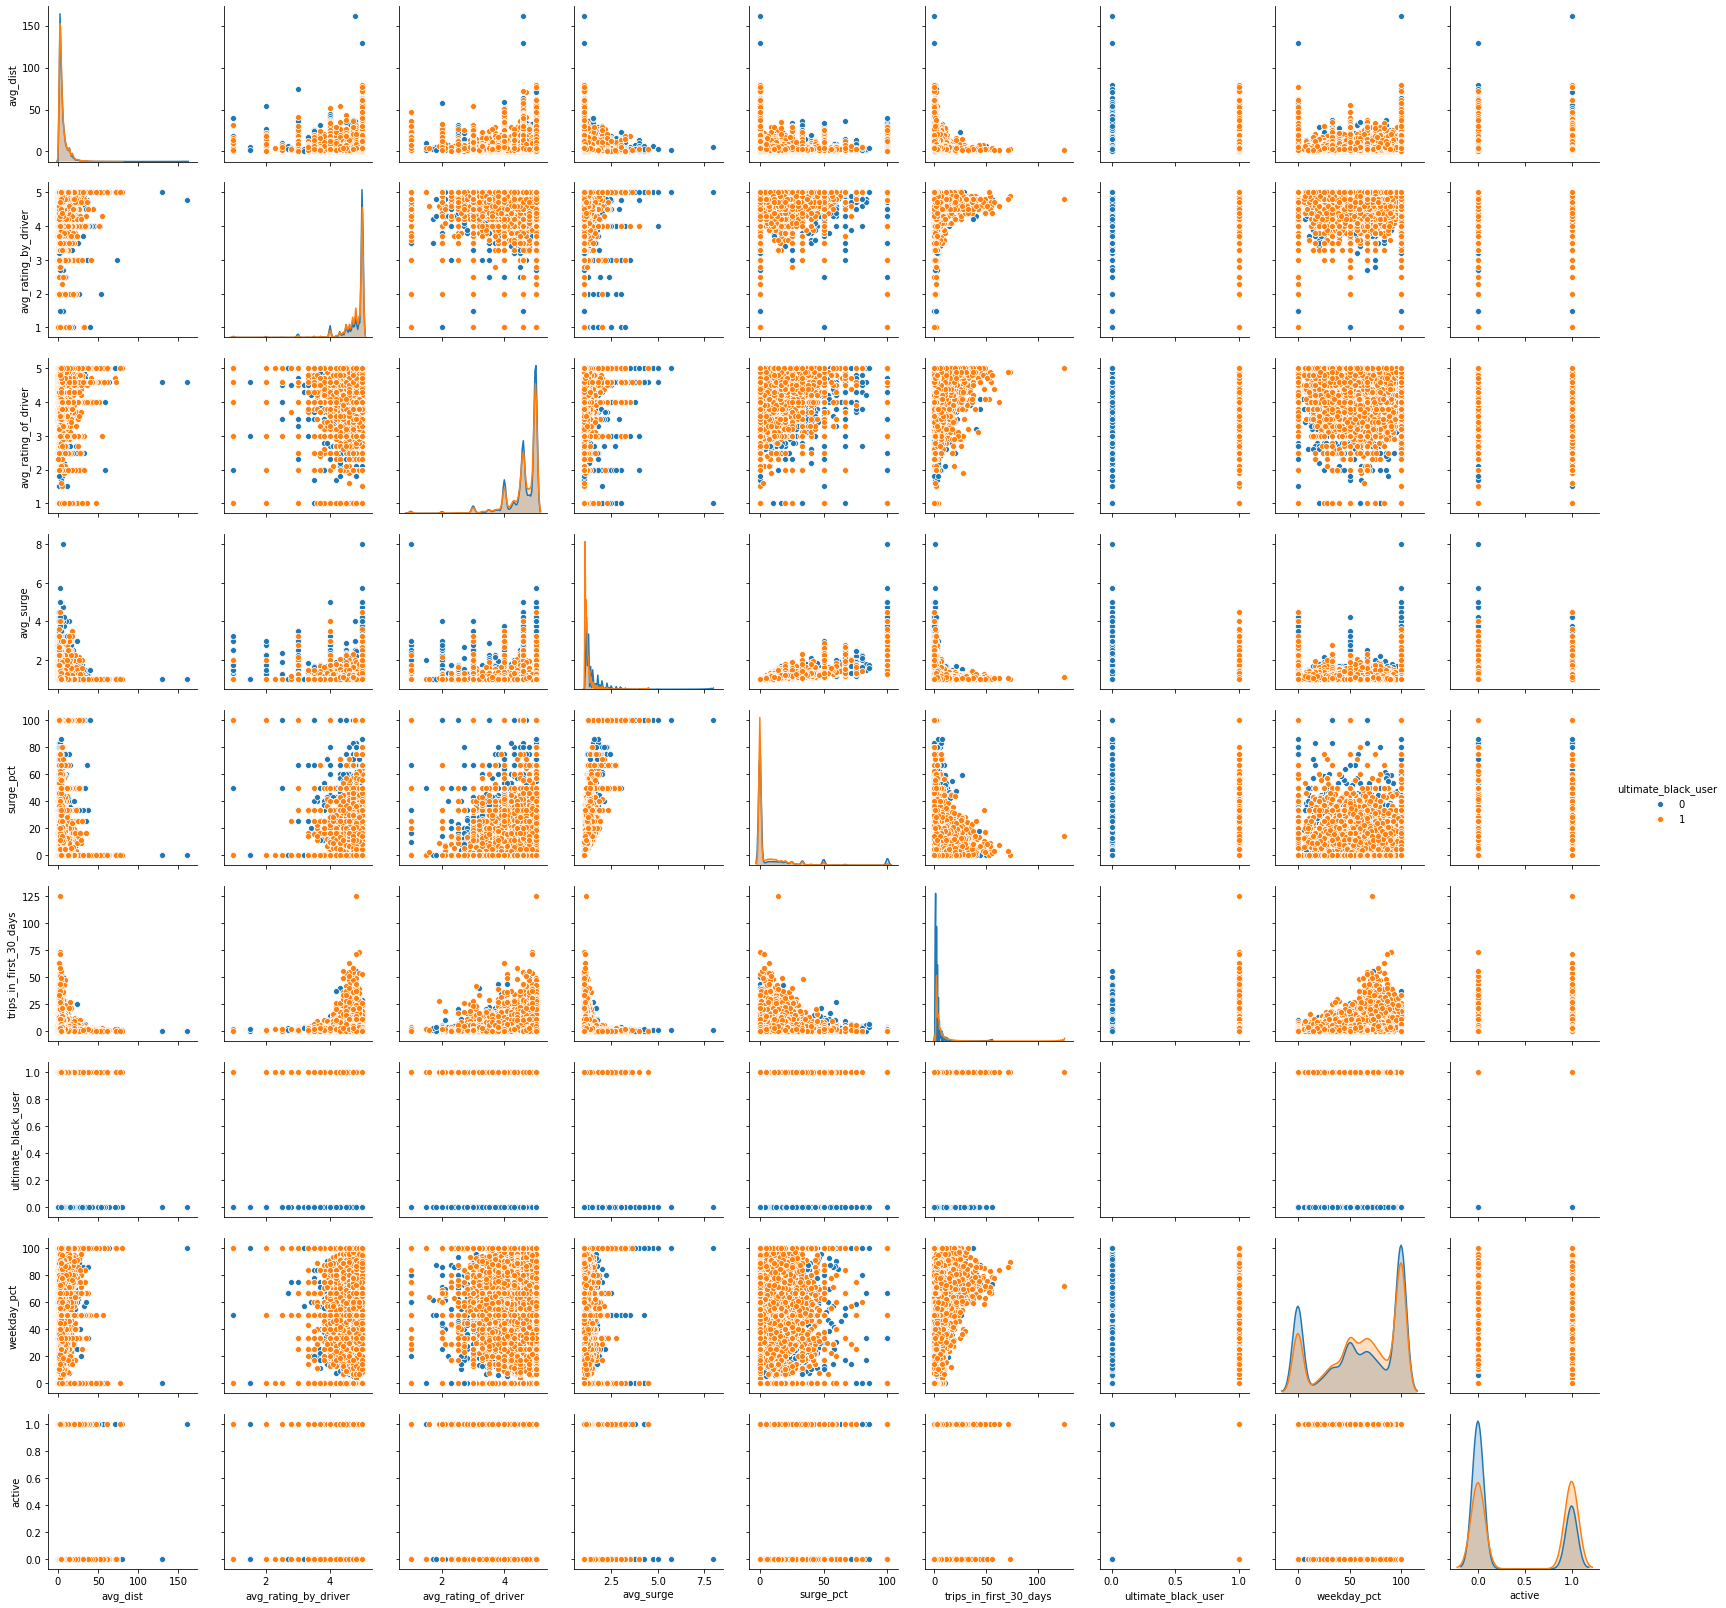

In [68]:
#sns.pairplot(Data, hue = 'ultimate_black_user')

In [30]:
numerical = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']
categorical = ['city', 'phone', 'ultimate_black_user']

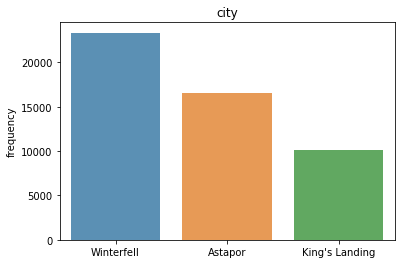

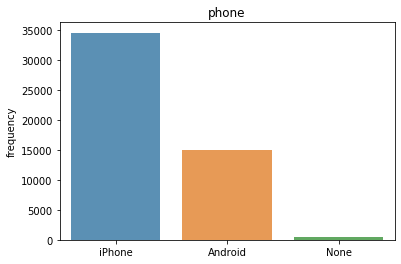

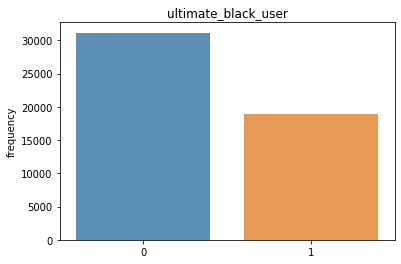

In [31]:
for col in categorical:
    count = Data[col].value_counts()
    sns.barplot(count.index, count.values, alpha=0.8)
    plt.title(col)
    plt.ylabel('frequency')
    plt.show()

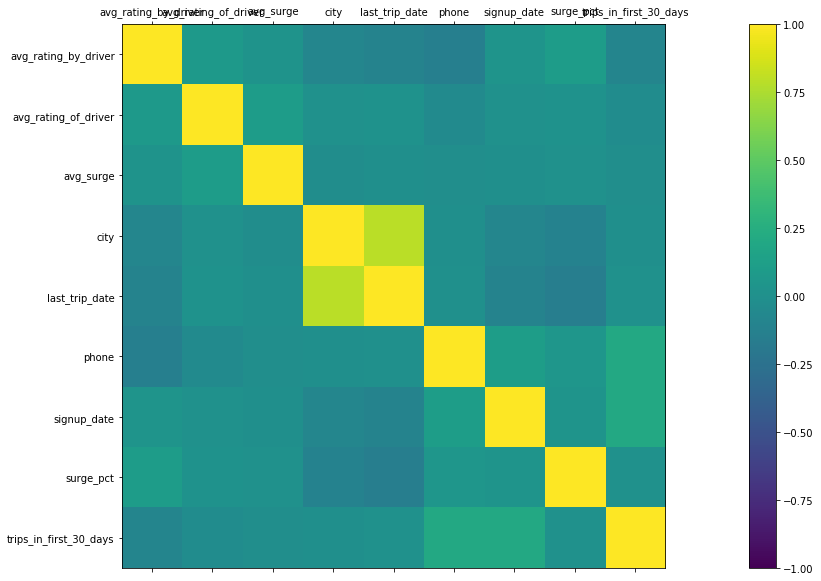

In [71]:
correlations = Data.corr()
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

We see that surge_pct and avg_surge are highly correlated with eachother at 0.79, and this makes sense given these two features are highly related to there being a surge or not. 

In [33]:
correlations

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
avg_dist,1.000000,0.079793,0.028508,-0.081491,-0.104414,-0.136329,0.032310,0.101652
avg_rating_by_driver,0.079793,1.000000,0.101660,0.010498,0.019964,-0.039097,0.009328,0.020366
avg_rating_of_driver,0.028508,0.101660,1.000000,-0.021653,-0.003290,-0.011060,-0.001916,0.012587
avg_surge,-0.081491,0.010498,-0.021653,1.000000,0.793582,-0.001841,-0.078791,-0.110071
surge_pct,-0.104414,0.019964,-0.003290,0.793582,1.000000,0.005720,-0.106861,-0.144918
trips_in_first_30_days,-0.136329,-0.039097,-0.011060,-0.001841,0.005720,1.000000,0.112210,0.050388
ultimate_black_user,0.032310,0.009328,-0.001916,-0.078791,-0.106861,0.112210,1.000000,0.035998
weekday_pct,0.101652,0.020366,0.012587,-0.110071,-0.144918,0.050388,0.035998,1.000000


In [34]:
# Assuming max of last trip date as date this data was collected since it is the latest date available
date = max(Data.last_trip_date)
print(date)
# Whether rider is retained from activity 30 days preceding latest date, activity in June
Data["active"] = (Data.last_trip_date >= (date + datetime.timedelta(-30))).astype(int)

2014-07-01 00:00:00


In [35]:
Data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0


In [77]:
correlations = Data.corr()
correlations 


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
avg_dist,1.000000,0.079793,0.028508,-0.081491,-0.104414,-0.136329,0.032310,0.101652,-0.092780
avg_rating_by_driver,0.079793,1.000000,0.101660,0.010498,0.019964,-0.039097,0.009328,0.020366,-0.026748
avg_rating_of_driver,0.028508,0.101660,1.000000,-0.021653,-0.003290,-0.011060,-0.001916,0.012587,-0.010829
avg_surge,-0.081491,0.010498,-0.021653,1.000000,0.793582,-0.001841,-0.078791,-0.110071,-0.003333
surge_pct,-0.104414,0.019964,-0.003290,0.793582,1.000000,0.005720,-0.106861,-0.144918,0.011797
trips_in_first_30_days,-0.136329,-0.039097,-0.011060,-0.001841,0.005720,1.000000,0.112210,0.050388,0.210463
ultimate_black_user,0.032310,0.009328,-0.001916,-0.078791,-0.106861,0.112210,1.000000,0.035998,0.205002
weekday_pct,0.101652,0.020366,0.012587,-0.110071,-0.144918,0.050388,0.035998,1.000000,0.009693
active,-0.092780,-0.026748,-0.010829,-0.003333,0.011797,0.210463,0.205002,0.009693,1.000000


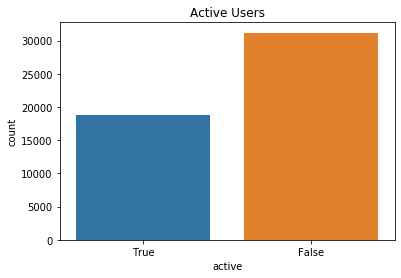

In [36]:
ax = sns.countplot(x="active", data=Data, order=[True, False])
ax.set_title('Active Users')

plt.show()



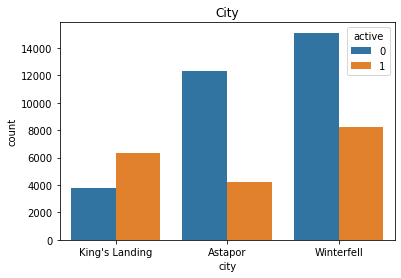

In [37]:
sns.countplot(x="city", hue='active', data=Data)
plt.title('City')
plt.show()


King's Landing seems to be especially successful in retaining users whereas Astapor is the least successful.

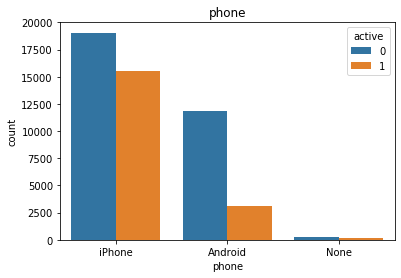

In [38]:
sns.countplot(x="phone", hue='active', data=Data)
plt.title('phone')
plt.show()


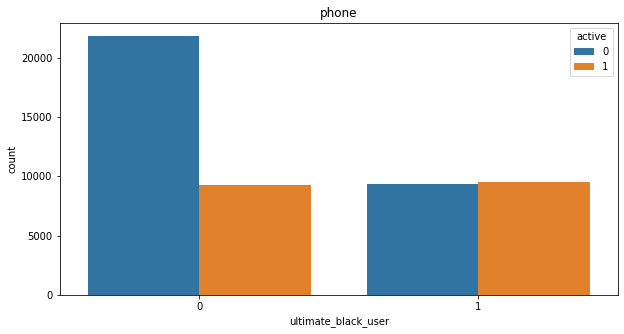

In [78]:
sns.countplot(x="ultimate_black_user", hue='active', data=Data)
plt.title('phone')
plt.show()

Ultimate Black Users are much more likely to be retained as compared to the rest of the population.

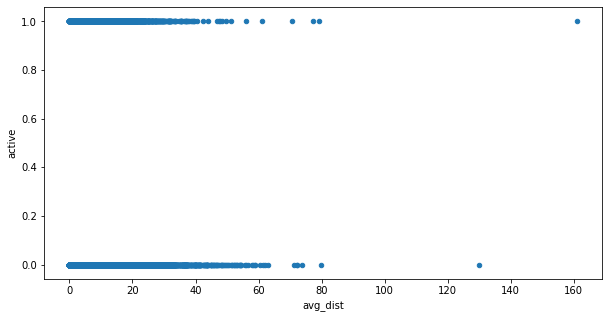

In [67]:
Data.plot(x='avg_dist' ,  y='active', kind ='scatter')

In [39]:
Data.drop(['last_trip_date','signup_date'], axis=1, inplace=True)

In [40]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [41]:
# One-hot-encode all categorical features
Data_encoded = pd.get_dummies(Data, columns = ['city', 'phone', 'ultimate_black_user'])

Data_encoded.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_None,phone_iPhone,ultimate_black_user_0,ultimate_black_user_1
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1,0,1,0,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0,1,0,0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0,1,0,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1,0,1,0,0,0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,0,1,1,0,0,1,0


In [42]:
Y = Data_encoded['active']
X = Data_encoded

X=X.drop('active',axis=1)

Since the problem is to classify whether the user will be active or not, this is binary classification problem.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Splitting the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=14)

#Create a Logistic Regression classifier
lg = LogisticRegression()

#Fit the classifier to the training data
lg.fit(X_train, y_train)

#Predict the labels for the test set:
y_pred = lg.predict(X_test)

#evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('The accuracy score is ', accuracy_score(y_test, y_pred)*100)

C:\Users\phaneendra.veguru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[5250  932]
 [1954 1864]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.78      6182
           1       0.67      0.49      0.56      3818

    accuracy                           0.71     10000
   macro avg       0.70      0.67      0.67     10000
weighted avg       0.71      0.71      0.70     10000

The accuracy score is  71.14


In [45]:
reg = LogisticRegression(solver='liblinear')
# Create regularization penalty space
penalty = ['l1', 'l2']      #l1 : lasso, l2:ridge

# Create regularization hyperparameter space
C =[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(reg, hyperparameters, cv=5, verbose=0)
model = clf.fit(X_train, y_train)

print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])
print("Tuned Logistic Regression Parameters: {}".format(model.best_params_)) 
print("Best score is {}".format(model.best_score_))


Best Penalty: l2
Best C: 0.005
Tuned Logistic Regression Parameters: {'C': 0.005, 'penalty': 'l2'}
Best score is 0.71945


In [51]:
# Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature

sort_features=dict(zip(X.columns[0:14], clf.feature_importances_))
cols = sorted(sort_features, key=lambda x: sort_features[x] , reverse=True)
for i in cols:
    print(i +'---', round(sort_features[i],4))

avg_dist--- 0.3015
weekday_pct--- 0.1315
avg_rating_by_driver--- 0.1118
surge_pct--- 0.0822
avg_rating_of_driver--- 0.0805
trips_in_first_30_days--- 0.0796
avg_surge--- 0.0645
city_King's Landing--- 0.0471
phone_iPhone--- 0.0199
phone_Android--- 0.0192
ultimate_black_user_0--- 0.0174
city_Astapor--- 0.0166
city_Winterfell--- 0.0111
phone_None--- 0.0011


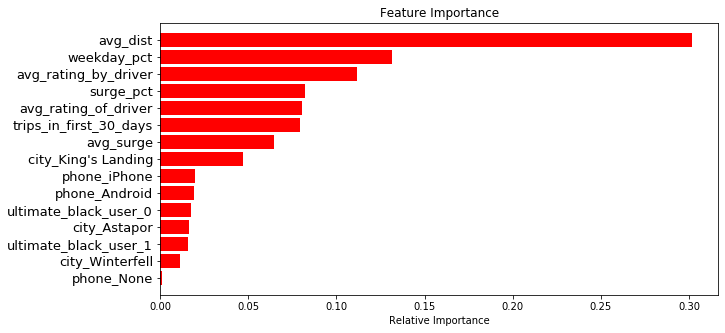

In [59]:
importance = clf.feature_importances_
sorted_importances = np.argsort(importance)
    
from pylab import rcParams
rcParams['figure.figsize']=(10,5)

plt.barh(range(X_train.shape[1]), importance[sorted_importances], color="r", align="center")
# Customize the plot
plt.yticks(range(X_train.shape[1]), X.columns[sorted_importances], fontsize=13)
plt.xlabel("Relative Importance")
plt.ylim([-1, X_train.shape[1]])
plt.title("Feature Importance")
plt.show()


In [61]:
# features that have an importance of more than 0.05
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(clf, threshold=0.05)

# Train the selector
sfm.fit(X_train, y_train)

for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[0:14][feature_list_index])

avg_dist
avg_rating_by_driver
avg_rating_of_driver
avg_surge
surge_pct
trips_in_first_30_days
weekday_pct


In [79]:
X_train_FS = sfm.transform(X_train)
X_test_FS = sfm.transform(X_test)

# Recommendations
Model was able to give an accurate of 71% , although it was better at predicting correctly those that were not active than predicting those that were active correctly.

Increase operations in King's Landing as they tend to have greater probability of conversion. Alternatively, discover what is unique about King's Landing drivers and passengers and check if it can be implemented in the other cities, especially Astapor.

If the user has taken a Ultimate Black, it indicates that they are more likely to stay. Provide addtional perks to these people.

People who use cabs on the weekdays(weekday_pct) are more likely to be retained. This is the 2nd most important feature. Provide more offers in the weekdays to encourage people to take cabs to work.